In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from matplotlib import pyplot

<div style = "color: #900C3F; font-size: 30px"><b>Reading Data</b></div>

In [30]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv("train.csv")
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


 <div style = "color: #900C3F; font-size: 30px"><b>EDA</b></div>

In [31]:
#variables data type, columns and other info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<div style = "color: #18B4C4; font-size: 20px"><b>check null values</b></div>

In [32]:
train_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

<div style = "color: #18B4C4; font-size: 20px"><b>Show some statistical about data like mean,min and max</b></div>

In [33]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


--------------------------------------------------------------------------------------------------------------

<div style = "color: #18B4C4; font-size: 20px"><b>Show the relationship between features through correlation matrix</b></div>

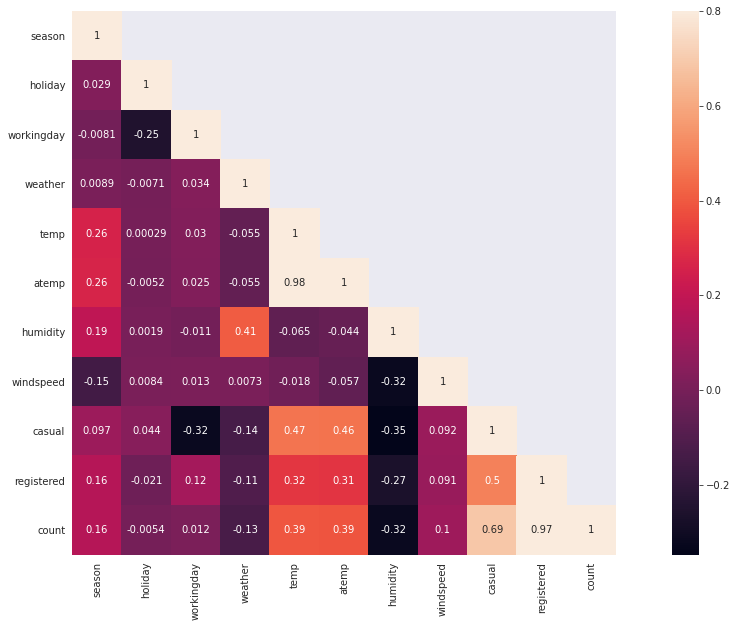

In [34]:
corrMatt = train_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<div style = "color: #18B4C4; font-size: 20px">the best relationships are between count,casual,registered, temp and atemp</div>

-------------------------------------------------------------------------------------------------------------

<div style = "color: #18B4C4; font-size: 20px"><b>Remove Outlires</b></div>

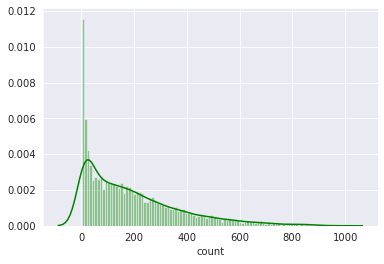

In [35]:
sns.set_style('darkgrid')
sns.distplot(train_data['count'], bins = 100, color = 'green')
plt.show()

In [36]:
def remove_outliers(data):
    Q1 = data['count'].quantile(0.25)
    Q3 = data['count'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data['count'] < (Q1 - 1.5 * IQR)) | (data['count'] > (Q3 + 1.5 * IQR))]
    data = data[~data.isin(outliers)]
    data = data[data['datetime'].notnull()]
    return data

<div style = "color: #18B4C4; font-size: 20px">As we see in the above correlation the count feature has strongth relation with other features, so we will remove the outlires that we can see in the above plot</div>

<div style = "color: #900C3F; font-size: 30px"><b>Feature Engineering</b></div>

In [37]:
def feature_engineering(data):
    #seprate datetime into date, hour, year, month and day
    data["date"] = data.datetime.apply(lambda x : x.split()[0])
    data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
    data['year'] = data['date'].apply(lambda x:x.split('-')[0])
    data['month'] = data['date'].apply(lambda x:x.split('-')[1])
    data['day'] = data['date'].apply(lambda x:x.split('-')[2])
    
    #create and explain weekday, season, day of week and weather 
    data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
    data["season"] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

    data['datetime'] = pd.to_datetime(data['datetime'])

    data['Day of Week'] = data['datetime'].apply(lambda x:x.dayofweek)
    data['weather'] = data['weather'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' })
    del data['datetime']        
    del data["date"]
    
    
    #Fixed-Width Binning on temp feature to see the relation between it and the count
    bin_ranges = [0, 15, 30, 45, 60]
    bin_names = [1, 2, 3, 4,]
    data['temp_bin_custom_range'] = pd.cut(np.array(data['temp']), bins=bin_ranges)
    data['temp_bin_custom_label'] = pd.cut(np.array(data['temp']), bins=bin_ranges,  labels=bin_names)
    
    return data

In [38]:
train_data = remove_outliers(train_data)
train_data = feature_engineering(train_data)

In [39]:
def eda_plots(data):
    #relationship between number of registered, non-registered user and season
    fig,ax = plt.subplots()
    fig.set_size_inches(12,5)
    sns.barplot(data=data,x="season",y="count",ax=ax)
    ax.set(xlabel='Season', ylabel='count',title="relationship between number of registered, non-registered user and season")
    plt.show()
        
    #relationship between number of registered, non-registered user and each month in the year
    fig,ax = plt.subplots()
    fig.set_size_inches(12,5)
    sns.barplot(data=train_data,x="month",y="count",ax=ax)
    ax.set(xlabel='Month', ylabel='count',title="relationship between number of registered, non-registered user and each month in the year")
    plt.show()
        
    #relationship between number of registered, non-registered user and each hour in a day
    fig,ax = plt.subplots()
    fig.set_size_inches(12,5)
    sns.barplot(data=train_data,x="hour",y="count",ax=ax)
    ax.set(xlabel='Hour on a day', ylabel='count',title="relationship between number of registered, non-registered user and each hour in a day") 
    plt.show()
    
    #relationship between temperature and the count
    fig,ax = plt.subplots()
    fig.set_size_inches(12,5)
    sns.barplot(data=data,x="temp_bin_custom_range",y="count",ax=ax)
    ax.set(xlabel='Temperature', ylabel='Count',title="relationship between number of registered, non-registered user and Temperature")
    plt.show()

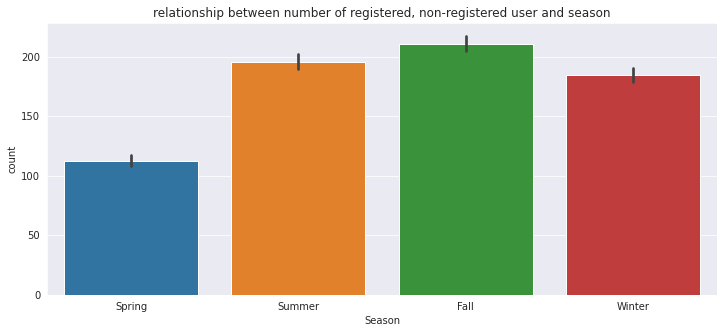

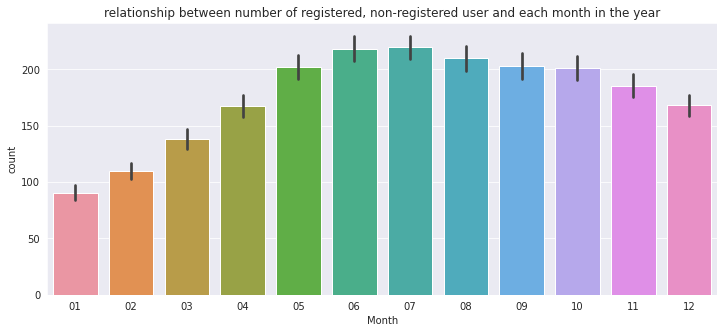

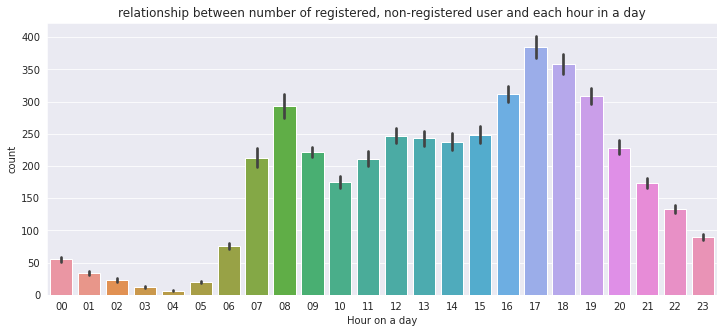

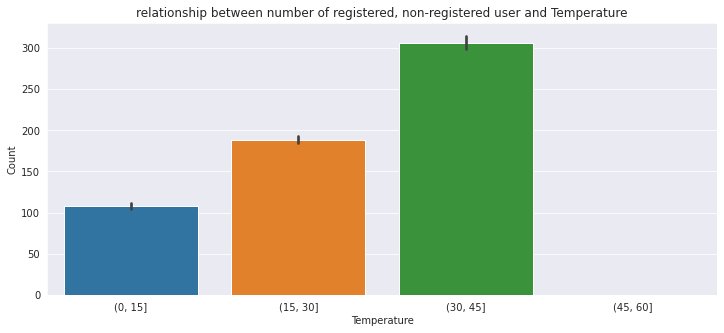

In [40]:
eda_plots(train_data)

<div style = "color: #18B4C4; font-size: 20px">The best count of users is in fall season and june and july month in day between 16 and 19 in the temperature range (30,45)</div>

------------------------------------------------------------------------------------------------

<div style = "color: #18B4C4; font-size: 20px">Encoding the data to be used in the models, in other words seprate the columns on each value to a new binary column</div>

In [41]:
def hot_encoding(data):
    data = pd.get_dummies(data=data, columns=['season', 'holiday', 'workingday', 'weather', 'Day of Week', 'hour', 'year', 'month', 'weekday', 'day'])
    return data

<div style = "color: #18B4C4; font-size: 20px">Split the data</div>

In [42]:
train_data = hot_encoding(train_data)
x = train_data.drop(columns = 'count')
y = train_data['count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train = x_train.drop(columns=['temp_bin_custom_range', 'temp_bin_custom_label'])
x_test = x_test.drop(columns=['temp_bin_custom_range', 'temp_bin_custom_label'])

----------------------------------------------------------------------------------------------------
<div style = "color: #900C3F; font-size: 30px"><b>Linear regression </b></div> 

In [43]:
def linear_regression_model(x_train, y_train, x_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return model,pred

In [44]:
lr_model,lr_pred = linear_regression_model(x_train, y_train, x_test)
lr_coef = pd.DataFrame(lr_model.coef_, x_train.columns, columns=['Coefficient'])
print(lr_coef)

            Coefficient
temp      -2.258073e-14
atemp      2.686740e-14
humidity  -3.608225e-16
windspeed  5.828671e-15
casual     1.000000e+00
...                 ...
day_15    -2.809004e-03
day_16    -2.809004e-03
day_17    -2.809004e-03
day_18    -2.809004e-03
day_19    -2.809004e-03

[89 rows x 1 columns]


In [45]:
lr_pred

array([181.,  73.,  28., ..., 340., 327., 104.])

<div style = "color: #18B4C4; font-size: 20px">Train the linear regression model on the train data and tet this model on the test data</div>

---------------------------------------------------------------------------------------------

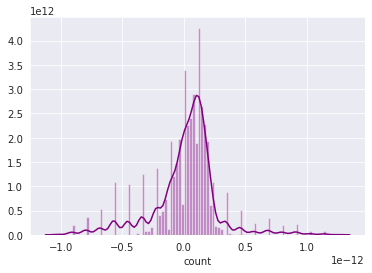

In [46]:
sns.distplot((y_test-lr_pred),bins=100, color = 'purple')
plt.show()


<div style = "color: #18B4C4; font-size: 20px">As the above distribution plot the similarity between predicted values from linear regression model and the actual values (y_test)</div>

------------------------------------------------------------------------------------------------------

<div style = "color: #18B4C4; font-size: 20px">nonlinear relation between features and the target variable</div>

In [47]:
def non_linear_predict():
    pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
    data_train = pf.fit_transform(x_train)
    data_test = pf.fit_transform(x_test)
    non_l_model,non_l_pred = linear_regression_model(data_train, y_train, data_test)
    return non_l_pred

In [48]:
predicted_non_linear = non_linear_predict()
predicted_non_linear

array([181.,  73.,  28., ..., 340., 327., 104.])

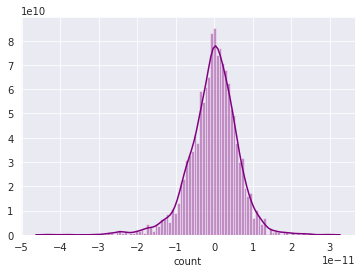

In [49]:
sns.distplot((y_test-predicted_non_linear),bins=100, color = 'purple')
plt.show()

<div style = "color: #18B4C4; font-size: 20px">Use degree 2 to make interaction between features and generate a non-linear model and the relation between predicted value and actual value is similar more than the simpli linear regression</div>

----------------------------------------------------------------------------------------------
<div style = "color: #900C3F; font-size: 30px"><b>Ridge regression</b></div>

In [50]:
def ridge_regression(x_train, y_train, x_test): 
    ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 0.01, 0.001])
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    return ridge,pred

In [51]:
ridge_model,ridge_pred = ridge_regression(x_train, y_train, x_test)
print("The value of alpha: ", ridge_model.alpha_)
ridge_pred

The value of alpha:  0.001


array([180.99527989,  73.01731337,  28.0254661 , ..., 339.9686368 ,
       326.96672278, 104.01304456])

--------------------------------------------------------------------------------------------------

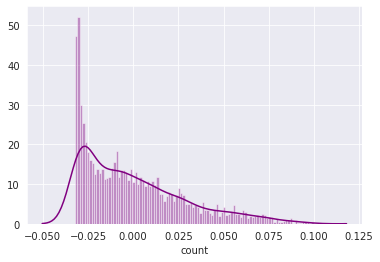

In [52]:
sns.distplot((y_test-ridge_pred),bins=100, color = 'purple')
plt.show()

<div style = "color: #18B4C4; font-size: 20px">choose the best alpha value and train the ridge model, then predict valuse for the test data, the relation between predicted value and actual value is very similar in ridge regression</div>

------------------------------------------------------------------------------------------------
<div style = "color: #900C3F; font-size: 30px"><b>KNN</b></div> 

In [53]:
error = []

#Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

### From the output we can see that the mean error is zero when the value of the K is between 1 and 10

Text(0, 0.5, 'Mean Error')

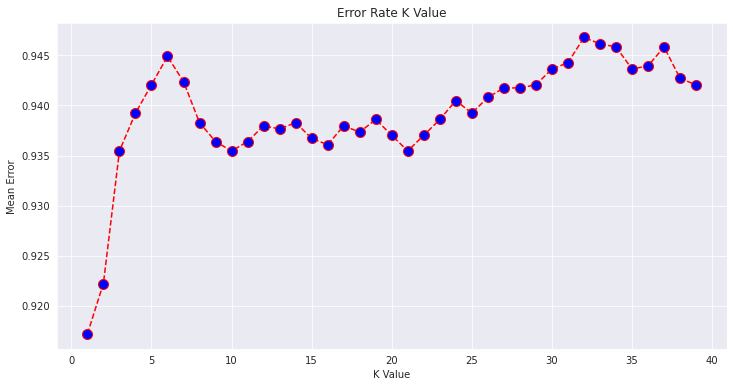

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<div style = "color: #18B4C4; font-size: 20px">choose the minimum value of error rate from the above plot, it's approximately between (0-5),(9-13)</div>

In [55]:
def knn():
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    return classifier

In [56]:
def knn_predict(model):
    pred = model.predict(x_test)
    return pred

In [57]:
knn_model = knn()
knn_pred = knn_predict(knn_model)
print(knn_pred)

[181.  70.  23. ... 317. 332.  95.]


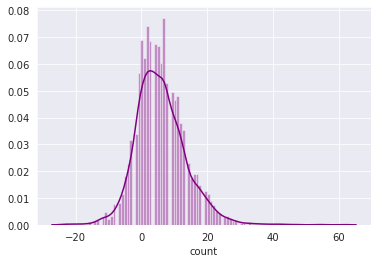

In [58]:
sns.distplot((y_test-knn_pred),bins=100, color = 'purple')
plt.show()

<div style = "color: #18B4C4; font-size: 20px">Train the model to predict the nearest 5 value and test the test dataset and predict the valuse,  the relation between predicted value and actual value is very similar in KNN</div>

------------------------------------------------------------------------------------------------
<div style = "color: #900C3F; font-size: 30px"><b>Decision Tree</b></div> 

In [59]:
def build_decision_tree():
    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(x_train, y_train)
    print("The accuracy of Decision Tree Regressor is: ", decision_tree.score(x_test, y_test))
    return decision_tree

In [60]:
def decision_tree_predict(model):
    pred = model.predict(x_test)
    return pred

In [61]:
decision_tree_model = build_decision_tree()
decision_tree_pred = decision_tree_predict(decision_tree_model)
print("Predicted value: ", decision_tree_pred)

The accuracy of Decision Tree Regressor is:  0.9988713861786229
Predicted value:  [181.  72.  28. ... 327. 332. 106.]


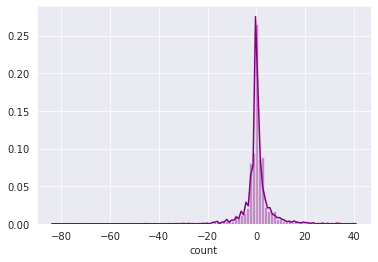

In [62]:
sns.distplot((y_test-decision_tree_pred),bins=100, color = 'purple')
plt.show()

<div style = "color: #18B4C4; font-size: 20px">Train the model to predict the value usinf decision tree, as the above distribution plot the similarity between predicted values from decision tree model and the actual values (y_test)</div>

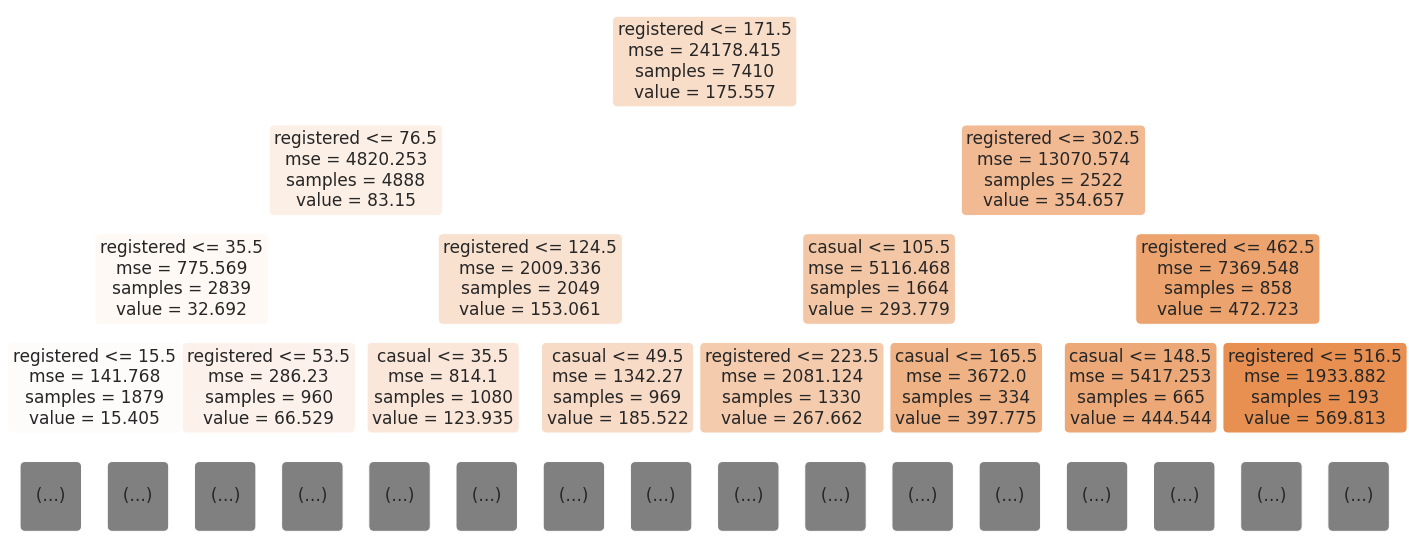

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(decision_tree_model, 
              feature_names=x_train.columns, 
              class_names=y_test, 
              filled=True, 
              rounded=True, 
              fontsize=17,max_depth=3)

<div style = "color: #900C3F; font-size: 30px"><b>feature_importance</b></div>

In [66]:
importance = decision_tree_model.feature_importances_

features_name = x_train.columns
feature_name = []
feature_score = []
for i,v in enumerate(importance):
    feature_name.append(features_name[i])
    feature_score.append(v * 10**3)

In [67]:
feature_importance = pd.DataFrame({'Features Name': feature_name, 'Features Score': feature_score})
feature_importance.sort_values(by=["Features Score"],ascending=False)   

,Features Name,Features Score
5,registered,938.662340
4,casual,61.071651
0,temp,0.031976
3,windspeed,0.029866
2,humidity,0.024682
...,...,...
30,hour_05,0.000051
31,hour_06,0.000047
29,hour_04,0.000010
28,hour_03,0.000004


<div style = "color: #18B4C4; font-size: 20px">As seen from dataframe above top 3 features have highest score are registered, casual and temp</div>